##Импорт библиотек, импорт датасета,описание, предобработка данных. Создание/удаление признаков, сводные таблицы


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv')

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Column Names
id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartment interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [ ]:
df.shape

(21613, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df['price'] = df['price'].astype('int64')
df['bathrooms'] = df['bathrooms'].astype('int64')
df['floors'] = df['floors'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  int64  
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

1.1 Создать новый признак price_per_sq_lot, который будет содержать среднюю стоимость за один кв. метр общей площади

In [ ]:
df['price_per_sq_lot'] = df['price'] / df['sqft_lot']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sq_lot
0,7129300520,20141013T000000,221900,3,1,1180,5650,1,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,39.274336
1,6414100192,20141209T000000,538000,3,2,2570,7242,2,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,74.288870
2,5631500400,20150225T000000,180000,2,1,770,10000,1,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,18.000000
3,2487200875,20141209T000000,604000,4,3,1960,5000,1,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,120.800000
4,1954400510,20150218T000000,510000,3,2,1680,8080,1,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,63.118812


1.2 Создать новый признак delta_renovated, который будет содержать разницу в годах между годом реновацией дома и годом постройки дома
Если реновации дома не было, то в новом признаке поставьте 0

In [ ]:
df['delta_renovated'] = df['yr_renovated'] - df['yr_built']
df.loc[df['delta_renovated'] < 0, 'delta_renovated'] = 0
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sq_lot,delta_renovated
0,7129300520,20141013T000000,221900,3,1,1180,5650,1,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,39.274336,0
1,6414100192,20141209T000000,538000,3,2,2570,7242,2,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,74.288870,40
2,5631500400,20150225T000000,180000,2,1,770,10000,1,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,18.000000,0
3,2487200875,20141209T000000,604000,4,3,1960,5000,1,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,120.800000,0
4,1954400510,20150218T000000,510000,3,2,1680,8080,1,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,63.118812,0


1.3 Создайте признаки года продажи, месяца продажи

In [ ]:
df['date'] = pd.to_datetime(df['date'] )
df["tr_year"] = df["date"].dt.year
df["tr_month"] = df["date"].dt.month
#df["date"] = df["date"].dt.strftime('%Y-%m')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sq_lot,delta_renovated,tr_year,tr_month
0,7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,...,0,98178,47.5112,-122.257,1340,5650,39.274336,0,2014,10
1,6414100192,2014-12-09,538000,3,2,2570,7242,2,0,0,...,1991,98125,47.7210,-122.319,1690,7639,74.288870,40,2014,12
2,5631500400,2015-02-25,180000,2,1,770,10000,1,0,0,...,0,98028,47.7379,-122.233,2720,8062,18.000000,0,2015,2
3,2487200875,2014-12-09,604000,4,3,1960,5000,1,0,0,...,0,98136,47.5208,-122.393,1360,5000,120.800000,0,2014,12
4,1954400510,2015-02-18,510000,3,2,1680,8080,1,0,0,...,0,98074,47.6168,-122.045,1800,7503,63.118812,0,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000,3,2,1530,1131,3,0,0,...,0,98103,47.6993,-122.346,1530,1509,318.302387,0,2014,5
21609,6600060120,2015-02-23,400000,4,2,2310,5813,2,0,0,...,0,98146,47.5107,-122.362,1830,7200,68.811285,0,2015,2
21610,1523300141,2014-06-23,402101,2,0,1020,1350,2,0,0,...,0,98144,47.5944,-122.299,1020,2007,297.852593,0,2014,6
21611,291310100,2015-01-16,400000,3,2,1600,2388,2,0,0,...,0,98027,47.5345,-122.069,1410,1287,167.504188,0,2015,1


1.4 Удалите признаки date, zipcode, lat, long

In [ ]:
df.drop(columns=['date', 'zipcode', 'lat', 'long', 'sqft_living15','sqft_lot15'], inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,price_per_sq_lot,delta_renovated,tr_year,tr_month
0,7129300520,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,39.274336,0,2014,10
1,6414100192,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,74.288870,40,2014,12
2,5631500400,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,18.000000,0,2015,2
3,2487200875,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,120.800000,0,2014,12
4,1954400510,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,63.118812,0,2015,2


Условие 2: 2 задача
Создайте датафрейм с клиентами:
clients = pd.DataFrame({
'client_id': [1459, 4684, 3498, 3942, 4535, 2308, 2866, 2765, 1472, 4236, 2295,
939, 3840, 280, 20, 4332, 3475, 4213, 3113, 4809, 2134, 2242,
2068, 4929, 1384, 1589, 3317, 2260, 1727, 1764, 1611, 1474],
'house_id': [8965450190, 6823100225, 5104540330, 2131701075, 1522700060,
1189000207, 6821600300, 7137950720, 9510920050, 6131600255,
5428000070, 1788800910, 8100400160, 3123049142, 6306800010,
5083000375, 7920100025, 1951600150, 809001400, 339600110,
1622049154, 1099600250, 8563000110, 2768100205, 3995700435,
8861700030, 3303980210, 7731100066, 8146100580, 825069097,
3889100029, 9524100196]
})

In [ ]:
clients = pd.DataFrame({
'client_id': [1459, 4684, 3498, 3942, 4535, 2308, 2866, 2765, 1472, 4236, 2295,
939, 3840, 280, 20, 4332, 3475, 4213, 3113, 4809, 2134, 2242,
2068, 4929, 1384, 1589, 3317, 2260, 1727, 1764, 1611, 1474],
'house_id': [8965450190, 6823100225, 5104540330, 2131701075, 1522700060, 1189000207, 6821600300, 7137950720, 9510920050, 6131600255, 5428000070, 1788800910, 8100400160, 3123049142, 6306800010,
5083000375, 7920100025, 1951600150, 809001400, 339600110,
1622049154, 1099600250, 8563000110, 2768100205, 3995700435,
8861700030, 3303980210, 7731100066, 8146100580, 825069097,
3889100029, 9524100196]
})
clients.head()

,client_id,house_id
0,1459,8965450190
1,4684,6823100225
2,3498,5104540330
3,3942,2131701075
4,4535,1522700060


In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   client_id  32 non-null     int64
 1   house_id   32 non-null     int64
dtypes: int64(2)
memory usage: 640.0 bytes


2.1 Присоедините к таблице clients данные по домам через метод join

In [ ]:
df = df.set_index('id')
clients = clients.set_index('house_id')

In [ ]:
clients.join(df).head()

,client_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,price_per_sq_lot,delta_renovated,tr_year,tr_month
339600110,4809,395000,3,2,1610,3755,2,0,0,3,7,1610,0,1987,0,105.193076,0,2014,9
809001400,3113,925000,3,1,1630,3200,1,0,0,4,8,1630,0,1912,0,289.062500,0,2014,9
825069097,1764,770000,3,2,2650,40705,2,0,0,3,9,2650,0,1994,0,18.916595,0,2014,6
1099600250,2242,260000,3,1,1710,6400,1,0,0,4,7,1240,470,1976,0,40.625000,0,2014,12
1189000207,2308,387000,2,2,1170,1394,2,0,0,3,8,1170,0,2001,0,277.618364,0,2014,10


2.2 Присоедините к таблице clients данные по домам через метод merge

In [ ]:
merged = clients.merge(df, left_on='house_id', right_on='id')
merged.head()

,client_id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,price_per_sq_lot,delta_renovated,tr_year,tr_month
0,1459,295000,3,2,1500,3060,2,0,0,3,7,1500,0,1994,0,96.405229,0,2015,2
1,4684,700000,4,1,1870,6000,1,0,0,5,8,1670,200,1949,0,116.666667,0,2015,4
2,3498,679000,4,2,3680,7236,2,0,0,3,10,3680,0,2006,0,93.836374,0,2015,5
3,3942,420000,3,1,1720,5000,1,0,0,3,8,1720,0,1932,2009,84.000000,77,2014,12
4,4535,518000,4,2,2520,14021,2,0,0,3,9,2520,0,1999,0,36.944583,0,2014,6


Составьте несколько сводных таблиц
3.1 Найдите среднюю стоимость домов в зависимости от количества спален
Отсортируйте от меньшей стоимости к большей

In [ ]:
df.pivot_table(index='bedrooms',
                   values='price_per_sq_lot',
                   aggfunc='mean')

,price_per_sq_lot
bedrooms,
0,87.656926
1,77.622939
2,115.308645
3,87.651069
4,80.462825
5,88.026569
6,91.795384
7,99.470341
8,146.992617


In [ ]:
df.reset_index(inplace= True )
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,price_per_sq_lot,delta_renovated,tr_year,tr_month
0,7129300520,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,39.274336,0,2014,10
1,6414100192,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,74.288870,40,2014,12
2,5631500400,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,18.000000,0,2015,2
3,2487200875,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,120.800000,0,2014,12
4,1954400510,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,63.118812,0,2015,2


3.3 Постройте таблицу с подсчетом количества домов в данных в зависимости от вида на набережную и оценкой вида

In [ ]:
pd.crosstab(index=df['waterfront'],
            columns=df['view'],
            values=df['id'],
            aggfunc='count')

view,0,1,2,3,4
waterfront,,,,,
0,19489.0,331.0,955.0,491.0,184.0
1,NaN,1.0,8.0,19.0,135.0


3.2 Найдите минимальную, среднюю и максимальную стоимости домов в зависимости от состояния дома

In [ ]:
df.groupby('delta_renovated').agg({'price': ['mean', 'min', 'max']})

price                  
                         mean      min      max
delta_renovated                                
0                5.303608e+05    75000  6885000
6                7.375000e+05   650000   825000
8                4.995000e+05   499500   499500
9                4.700250e+05   152275   932800
10               2.160000e+06  2160000  2160000
...                       ...      ...      ...
108              7.132857e+05   408000  1045000
109              2.850000e+05   285000   285000
110              5.375000e+05   435000   640000
113              8.700000e+05   870000   870000
114              9.346667e+05   499000  1400000

[106 rows x 3 columns]

In [ ]:
df.pivot_table(index='delta_renovated',
                  aggfunc={'price': ['mean', 'min', 'max']})

price                       
                     max          mean      min
delta_renovated                                
0                6885000  5.303608e+05    75000
6                 825000  7.375000e+05   650000
8                 499500  4.995000e+05   499500
9                 932800  4.700250e+05   152275
10               2160000  2.160000e+06  2160000
...                  ...           ...      ...
108              1045000  7.132857e+05   408000
109               285000  2.850000e+05   285000
110               640000  5.375000e+05   435000
113               870000  8.700000e+05   870000
114              1400000  9.346667e+05   499000

[106 rows x 3 columns]

##Итоговое задание 

#1 Задача
1.2 Изучите стоимости недвижимости
1.3 Изучите распределение квадратуры жилой
2.1.4 Изучите распределение года постройки
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы


Я буду рассматривать задание в разрезе цены за квадратный метр, так как это более наглядно

In [ ]:
df[['price_per_sq_lot']].describe().round()

,price_per_sq_lot
count,21613.0
mean,89.0
std,94.0
min,0.0
25%,33.0
50%,59.0
75%,108.0
max,2027.0


In [ ]:
df['price_per_sq_lot'].mode()

0    100.0
Name: price_per_sq_lot, dtype: float64

In [ ]:
df[['yr_built','sqft_living']].describe().round()

,yr_built,sqft_living
count,21613.0,21613.0
mean,1971.0,2080.0
std,29.0,918.0
min,1900.0,290.0
25%,1951.0,1427.0
50%,1975.0,1910.0
75%,1997.0,2550.0
max,2015.0,13540.0


In [ ]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [ ]:
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
9890      1
5584      1
1961      1
5720      1
1425      1
Name: sqft_living, Length: 1038, dtype: int64

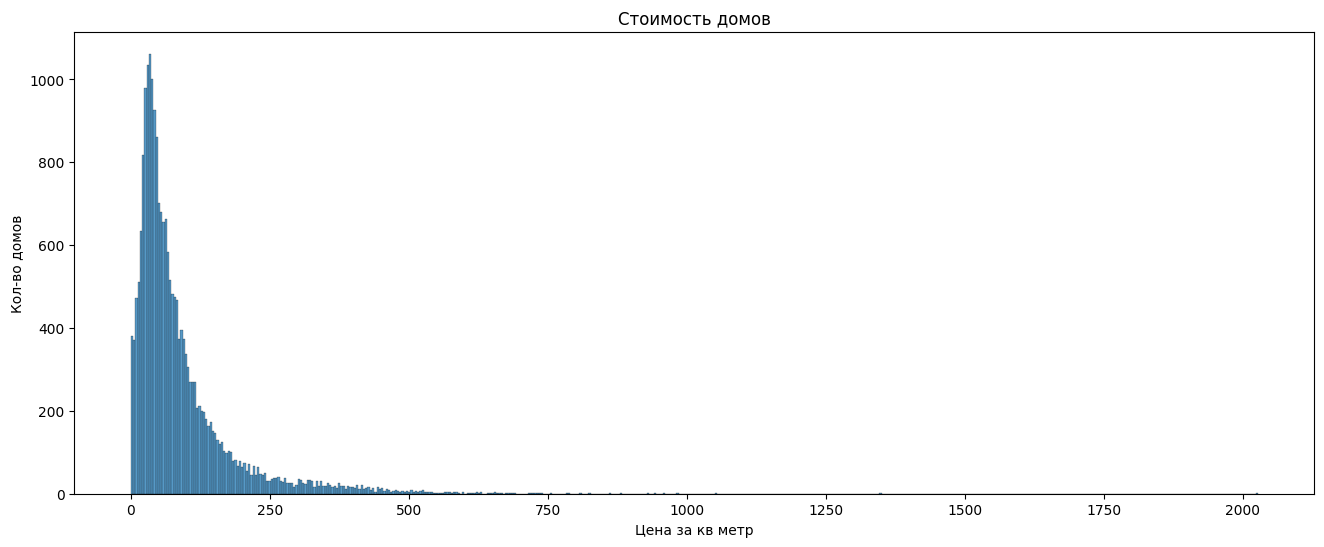

In [ ]:
plt.figure(figsize=(16, 6))
sns.histplot(df['price_per_sq_lot'], bins=500)
plt.title('Стоимость домов')
plt.xlabel('Цена за кв метр')
plt.ylabel('Кол-во домов');

На графике , а также по статистическим показателям поля стоимость за кв метр можно увидеть, что распределение стоимости не является нормальным. Стандартное отклонение имеет большое значение относительно среднего значения благодаря выбросам. Также среднее значение и медиана имеют большую разницу. что также не позволяет говорить о распределении как о нормальном.
Вывод - 75 % данных имеют значения от 0 до 108, мода - 100 , то есть большая часть домов имеют умеренную стоимость.
Далее рассмотрим зависимости стоимости от других параметров- года постройки и площади жилья.




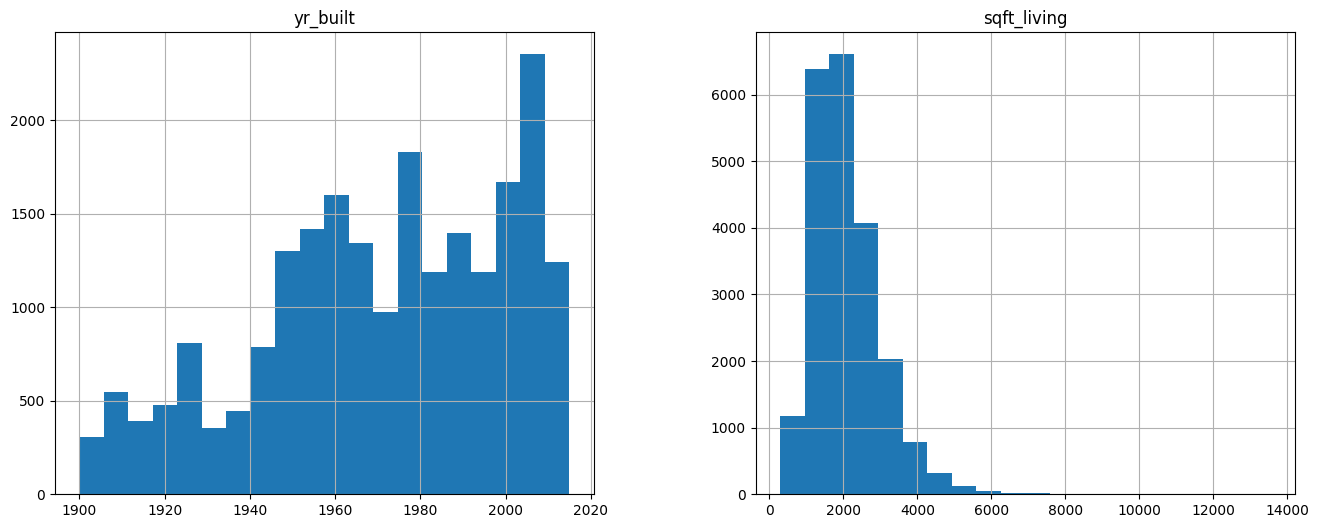

In [ ]:
df_1 = df[['yr_built','sqft_living']]
df_1.hist(figsize=(16, 6), bins=20, grid=True);

Больше всего домов было построено в 2014 году ,также был всплеск строительства с 2003 по 2006. Однако 75% жилья, представленного на рынке было построено до 1997 года.
Средняя квадратура домов 2080 кв м. Большая часть домов имеют квадратуру от 1300 до 1660 кв.м.

<Axes: xlabel='sqft_living', ylabel='price_per_sq_lot'>

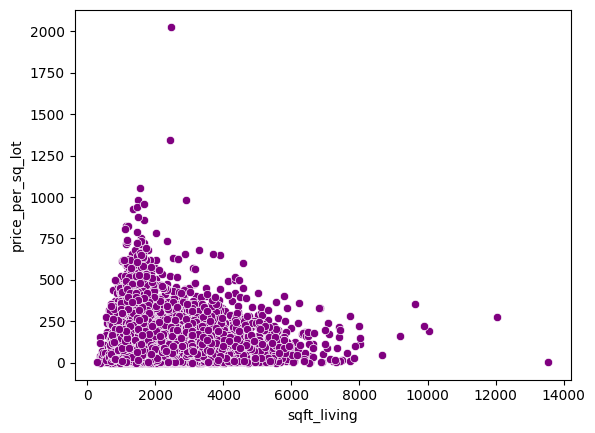

In [ ]:
sns.scatterplot(x='sqft_living',y='price_per_sq_lot',data=df,color='purple')

График выше показывает, что стоимость жилья не во всех случаях напрямаю зависит от квадратуры. Большое количество точек расположен в одной ценовой категории , но с увеличением квадратуры.Также на графике можно увидеть выброс - квартира небольшой площади, но по самой высокой цене, а также квартира самой большой площади имеет цену ,близкую к минимальной.
Симметричный рост мы видим в сегменте квартир небольшой площади - до 2000 кв.м.
Делаем вывод, что при формировании стоимости домов площадь не является решающим фактором, а одним из.


<Axes: xlabel='yr_built', ylabel='price_per_sq_lot'>

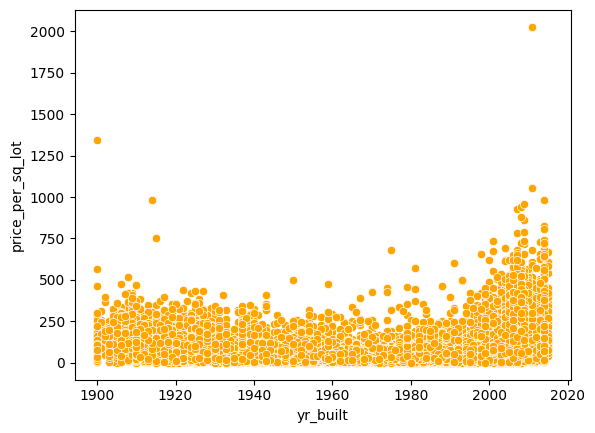

In [ ]:
sns.scatterplot(x='yr_built',y='price_per_sq_lot',data=df,color='orange')

 На графике видна прямая корреляция но только для домов, построенных с конца 90-х - чем новее дом, тем выше цена.
 Дома старше такой зависимости не имеют. Можно предположить, что дома старше 1990 считаются устаревшим жилым фондом, в целом.


#2 задача
2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы
2.2 Изучите распределение этажей домов
2.2 Изучите распределение состояния домов


In [ ]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

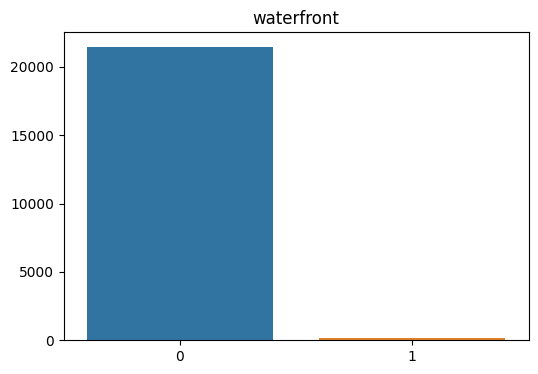

In [ ]:
counts = df['waterfront'].value_counts()
plt.figure(figsize=(6, 4))    
plt.title('waterfront')
sns.barplot(x=counts.index, y=counts.values)  
plt.show()

Большая часть домов не имеет вида на набережную

In [ ]:
df['floors'].value_counts()

1    12590
2     8402
3      621
Name: floors, dtype: int64

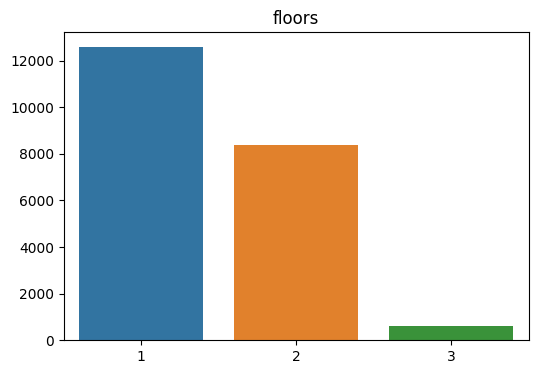

In [ ]:
counts = df['floors'].value_counts()   
plt.figure(figsize=(6, 4))    
plt.title('floors')
sns.barplot(x=counts.index, y=counts.values)
plt.show()

Большая часть домов имеют 1 этаж, Меньше всего домов в три этажа.

Для анализа состояния домов используем показатель view


In [ ]:
df['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

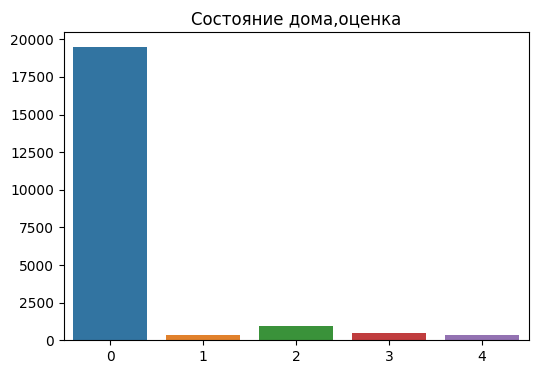

In [ ]:
counts = df['view'].value_counts()   
plt.figure(figsize=(6, 4))    
plt.title('Состояние дома,оценка')
sns.barplot(x=counts.index, y=counts.values)
plt.show()

Мы видим, что большая часть домов из каталога оценивается на 0 баллов, то есть находится в плохом состоянии. Далее по количеству идет оценка 2.
Далее мы рассмотрим зависимости между показателями и определим - на какие показатели влияет состояние домов.

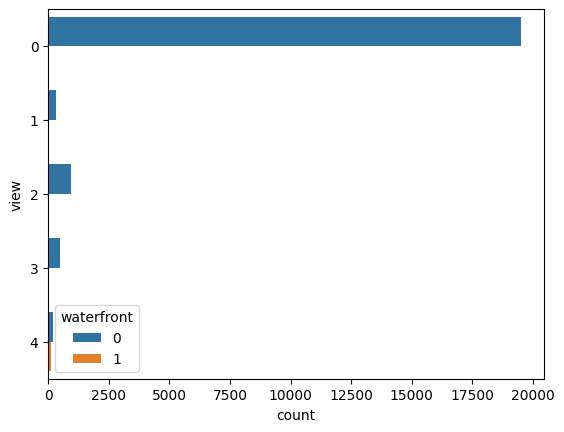

In [ ]:
sns.countplot(y = 'view', hue = 'waterfront', data = df);

In [ ]:
pd.crosstab(index=df['view'],
            columns=df['waterfront'])            
#values=df['price_per_sq_lot'],
#aggfunc='mean').round()

waterfront,0,1
view,,
0,19489,0
1,331,1
2,955,8
3,491,19
4,184,135


Видно, что дома на набережной поддерживаются в хорошем состоянии, так как среди домов с видом на воду больше всего оценок 4 и ни одной оценки 0.


In [ ]:
pd.crosstab(index=df['floors'],
            columns=df['waterfront'])

waterfront,0,1
floors,,
1,12512,78
2,8325,77
3,613,8


Среди домов с видом на набережную почти все дома имеют этажность 1 или 2 

In [ ]:
pd.crosstab(index=df['floors'],
            columns=df['waterfront'],values=df['price_per_sq_lot'],
aggfunc='mean').round()

waterfront,0,1
floors,,
1,62.0,82.0
2,110.0,140.0
3,351.0,334.0


Средняя стоимость домов на набережной выше только для 1 и 2 этажных домов 

In [ ]:
pd.crosstab(index=df['floors'],
            columns=df['view'],values=df['price_per_sq_lot'],
aggfunc='mean').round()

view,0,1,2,3,4
floors,,,,,
1,60.0,81.0,79.0,81.0,99.0
2,108.0,128.0,127.0,137.0,139.0
3,355.0,346.0,275.0,398.0,284.0


На пересечении признаков количество этажей и внешний вид дома самыми дорогими оказались 3-этажные дома с оценкой их солстояния 3, 0 и 1. При этом 3-этажные дома с оценкой  4 -дешевле. 
По категориям 1 и2 этажных домов и их оценке результат ожидаемый - чем лучше состояние ,тем выше цена за кв.м.

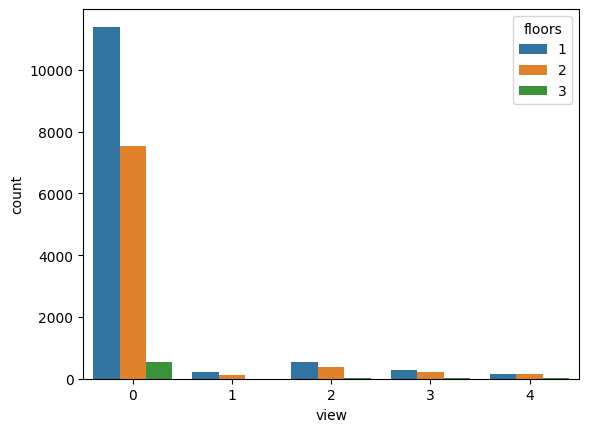

In [ ]:
sns.countplot(x = 'view', hue = 'floors', data = df);

#3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


Выше мы разобрали несколько признаков недвижимости , и немного коснулись их влияния на цену. Для более объемного анализа и вычленения наиболее важных признаков мы используем матрицу корреляции. Затем признаки ,которые покажутся нам интересными для исследования , рассмотрим подробнее.


In [ ]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,price_per_sq_lot,delta_renovated,tr_year,tr_month
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.0,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.3,0.0,0.0,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.0
bathrooms,0.0,0.5,0.5,1.0,0.7,0.0,0.5,0.0,0.0,0.0,0.6,0.6,0.3,0.4,0.0,0.0,0.0,0.0,0.0
sqft_living,0.0,0.7,0.6,0.7,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
floors,0.0,0.0,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.6,0.0,0.4,0.0,0.0,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0


<Axes: >

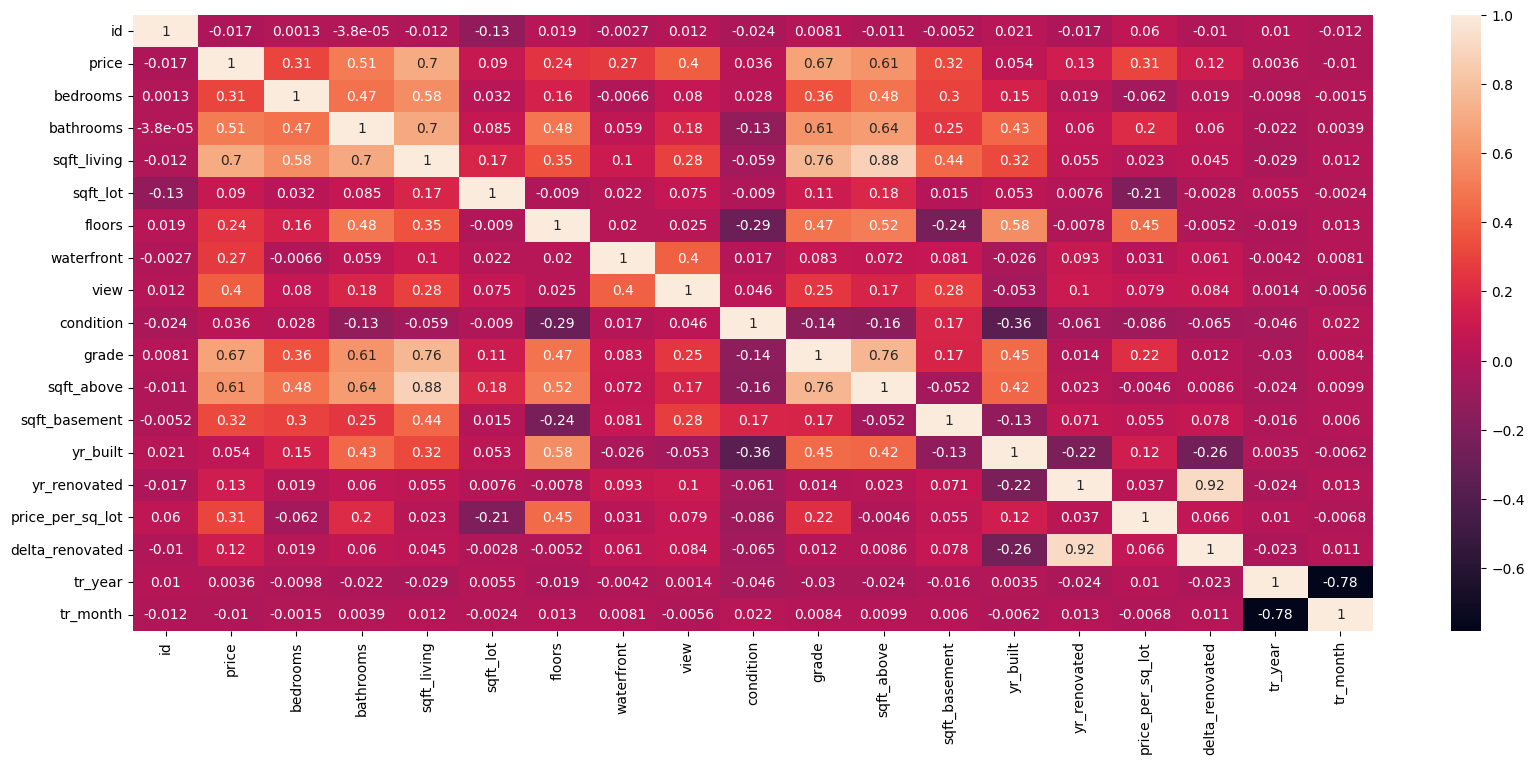

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(df.corr(),annot=True)

Признак price имеет среднюю (до 0,7 ) корреляцию с признаками grade, sqft_above, bathrooms, sqft_living
Слабую(до 0,5) - с view, waterfront, bedrooms, sqft_basement, floors


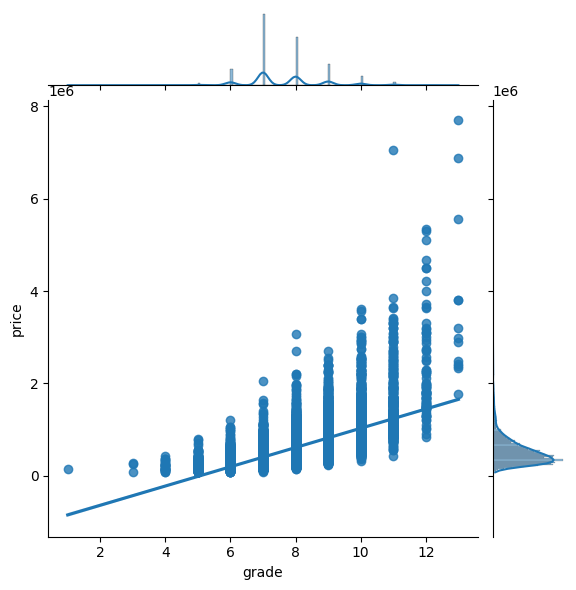

In [ ]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg');

Параметр , отражающий состояние интерьера и дизайна имеет непосредственное влияние на стоимость дома . Нижняя граница стоимости домов, имеющих оценку выше 12 выше чем в других случаях.

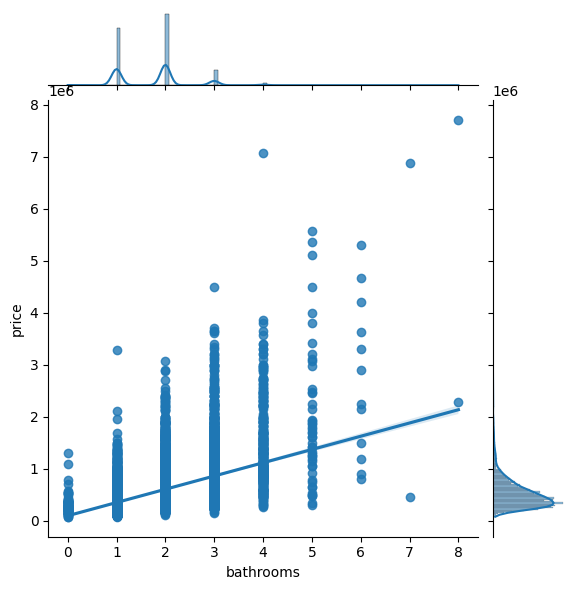

In [ ]:
sns.jointplot(x=df['bathrooms'], y=df['price'], kind='reg');

Цена домов , имеющих до 4 ванных комнат имеют прямую зависимость - цена тем выше чем больше ванных комнат в доме. 4 ванных комнаты и более уже не имеют прямого влияния на цену

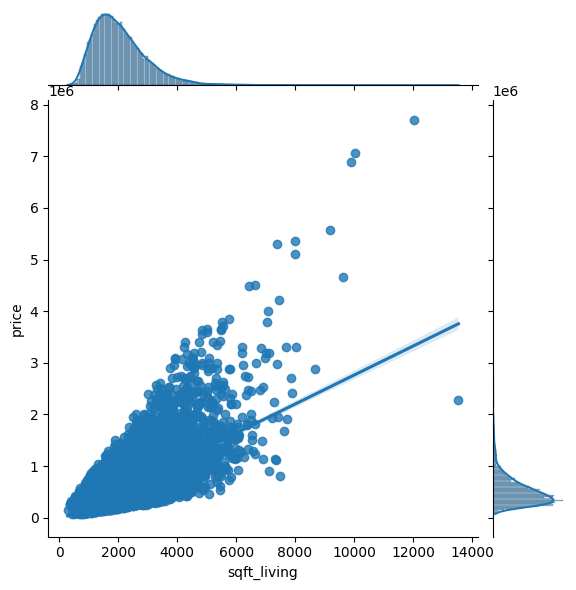

In [ ]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

Линейная зависимость между жилой площадью дома и ценой.На графике есть выброс - дом с самой большой площадью и ,при этом, недорогой - рекомендуется проверить данные более детально.


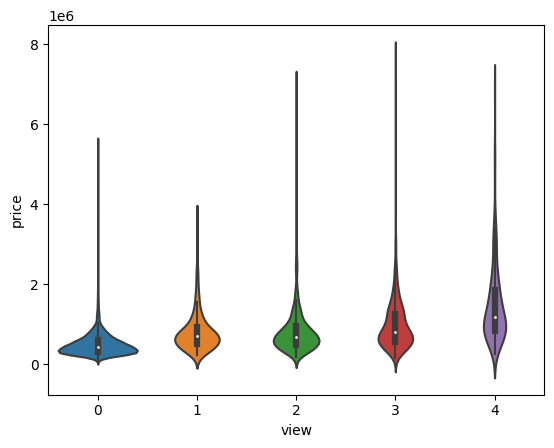

In [ ]:
sns.violinplot(x=df['view'], y=df['price'], kind='reg');

При оценке состояния "0" - распределение плотное, разброс цен небольшой. Далее  медианная стоимость повышается вместе с улучшением состояния дома. При оценке 1 и 2  нет больших отличий между графиками распределения цен.

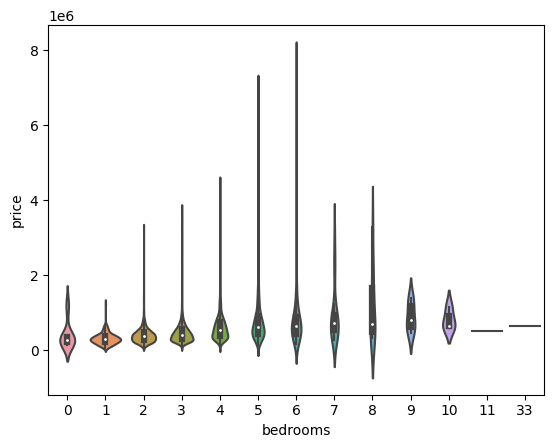

In [ ]:
sns.violinplot(x=df['bedrooms'], y=df['price'], kind='reg');

Медианная цена на дома растет начиная с 2 спален и до 6. Также на дома с 6 спальнями приходится максимум цены. Дома с 8 спальнями имеют большой разброс в ценах - минимальная цена ниже цен на дома ,имеющие от 0 до 7 спален.
На дома , имеющие 9 и более спален можно заметить снижение медианной стоимости.


##Итог:
Обнаружено наибольшее влияние на цену признака grade, sqrd_above, sqrd_living, bathrooms. Рекомендуется сосредоточится на них для дальнейшего анализа данных и использования данных для ML.